# projects - Boston, Reuters, CIFAR 10 with simple models

## Rubric:

### Boston, Reuters, CIFAR10 프로젝트를 성공적으로 완료하였는가?
    - 프로젝트의 지시 사항을 따라 데이터 전처리, 모델 구성, 모델 학습을 올바르게 진행하였다.



### Boston housing dataset

    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per 10,000 dollars
    PTRATIO - pupil-teacher ratio by town
    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT - % lower status of the population
    MEDV - Median value of owner-occupied homes in 1000 dollars


In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

print(len(train_data))     #404
print(len(test_data))      #102

404
102


In [3]:
from sklearn.preprocessing import StandardScaler    # mean to 0, std to 1

scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.fit_transform(test_data)

In [4]:
model = models.Sequential()

model.add(layers.Input(train_data.shape[1]))
model.add(layers.BatchNormalization())
model.add(layers.Dense(50, activation = 'relu', activity_regularizer = 'l2'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(50, activation='relu',activity_regularizer='l2'))
model.add(layers.Dense(1)) 

model.compile(optimizer='adam', loss='mse', metrics=['mae']) 

In [5]:
history = model.fit(train_data, train_labels, epochs=100, batch_size=16, verbose=2,validation_data=(test_data, test_labels))


Epoch 1/100
26/26 - 2s - loss: 525.5894 - mae: 20.9921 - val_loss: 498.6207 - val_mae: 20.4488
Epoch 2/100
26/26 - 0s - loss: 405.3780 - mae: 18.0232 - val_loss: 326.0344 - val_mae: 16.0497
Epoch 3/100
26/26 - 0s - loss: 209.1306 - mae: 12.0282 - val_loss: 117.7508 - val_mae: 8.9230
Epoch 4/100
26/26 - 0s - loss: 98.3984 - mae: 7.2750 - val_loss: 58.3339 - val_mae: 5.8489
Epoch 5/100
26/26 - 0s - loss: 69.6886 - mae: 5.9290 - val_loss: 41.3867 - val_mae: 4.8618
Epoch 6/100
26/26 - 0s - loss: 56.2637 - mae: 5.3008 - val_loss: 34.3135 - val_mae: 4.3582
Epoch 7/100
26/26 - 0s - loss: 53.2288 - mae: 5.1433 - val_loss: 29.6549 - val_mae: 3.9861
Epoch 8/100
26/26 - 0s - loss: 45.9976 - mae: 4.8041 - val_loss: 27.6741 - val_mae: 3.7891
Epoch 9/100
26/26 - 0s - loss: 46.6309 - mae: 4.9317 - val_loss: 28.3267 - val_mae: 3.7777
Epoch 10/100
26/26 - 0s - loss: 44.2881 - mae: 4.6671 - val_loss: 27.3929 - val_mae: 3.6204
Epoch 11/100
26/26 - 0s - loss: 38.8210 - mae: 4.3759 - val_loss: 27.9622 - va

Epoch 91/100
26/26 - 0s - loss: 22.3018 - mae: 3.2431 - val_loss: 23.5230 - val_mae: 3.0025
Epoch 92/100
26/26 - 0s - loss: 22.2954 - mae: 3.3569 - val_loss: 24.4707 - val_mae: 3.0918
Epoch 93/100
26/26 - 0s - loss: 22.6547 - mae: 3.4534 - val_loss: 24.6142 - val_mae: 3.0912
Epoch 94/100
26/26 - 0s - loss: 24.0159 - mae: 3.3702 - val_loss: 24.8977 - val_mae: 2.9841
Epoch 95/100
26/26 - 0s - loss: 22.7779 - mae: 3.3474 - val_loss: 25.8531 - val_mae: 3.2571
Epoch 96/100
26/26 - 0s - loss: 21.7435 - mae: 3.3404 - val_loss: 25.1957 - val_mae: 3.0620
Epoch 97/100
26/26 - 0s - loss: 23.0002 - mae: 3.4882 - val_loss: 25.9544 - val_mae: 3.1986
Epoch 98/100
26/26 - 0s - loss: 24.1906 - mae: 3.5595 - val_loss: 26.0200 - val_mae: 3.1164
Epoch 99/100
26/26 - 0s - loss: 25.6851 - mae: 3.6374 - val_loss: 26.4121 - val_mae: 3.2286
Epoch 100/100
26/26 - 0s - loss: 21.9801 - mae: 3.3263 - val_loss: 26.6492 - val_mae: 3.2612


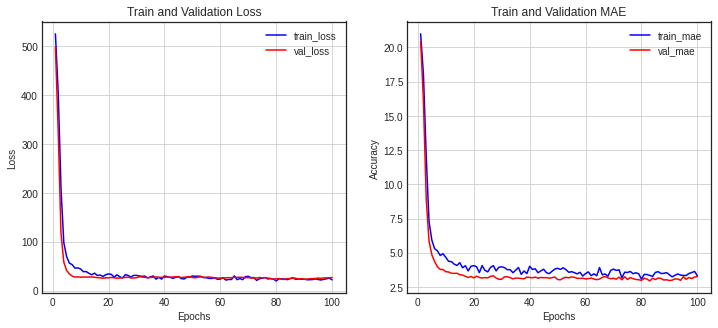

In [6]:
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [7]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 26.6492 - mae: 3.2612


[26.649246215820312, 3.261197566986084]

### REUTERS data set(num_words=10000)

#### Arguments

__path__: where to cache the data (relative to ~/.keras/dataset).<br>
__num_words__: integer or None. Words are ranked by how often they occur (in the training set) and only the num_words most frequent words are kept. Any less frequent word will appear as oov_char value in the sequence data. If None, all words are kept. Defaults to None.<br>
__skip_top__: skip the top N most frequently occurring words (which may not be informative). These words will appear as oov_char value in the dataset. 0 means no words are skipped. Defaults to 0.<br>
__maxlen__: int or None. Maximum sequence length. Any longer sequence will be truncated. None means no truncation. Defaults to None.<br>
__test_split__: Float between 0. and 1.. Fraction of the dataset to be used as test data. 0.2 means that 20% of the dataset is used as test data. Defaults to 0.2.<br>
__seed__: int. Seed for reproducible data shuffling.<br>
__start_char__: int. The start of a sequence will be marked with this character. 0 is usually the padding character. Defaults to 1.<br>
__oov_char__: int. The out-of-vocabulary character. Words that were cut out because of the num_words or skip_top limits will be replaced with this character.<br>
__index_from__: int. Index actual words with this index and higher.<br>
__**kwargs__: Used for backwards compatibility.<br>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [9]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=2023)

In [10]:
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, sequence in enumerate(data):
        results[i, sequence] = 1.
    return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

In [11]:
model = models.Sequential()
model.add(layers.Input(x_train.shape[1]))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               1280128   
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 46)               

In [12]:
checkpoint_cb = callbacks.ModelCheckpoint("best_model.h5", save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, restore_best_weights=True)


In [13]:
history = model.fit(x_train, y_train, epochs=100, batch_size=8, validation_data=(x_val, y_val), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
842/842 [==============================] - 4s 4ms/step - loss: 1.7972 - accuracy: 0.6090 - val_loss: 1.1185 - val_accuracy: 0.7645
Epoch 2/100
842/842 [==============================] - 3s 3ms/step - loss: 1.0819 - accuracy: 0.7466 - val_loss: 0.9619 - val_accuracy: 0.7850
Epoch 3/100
842/842 [==============================] - 3s 3ms/step - loss: 0.7973 - accuracy: 0.8043 - val_loss: 0.9118 - val_accuracy: 0.7961
Epoch 4/100
842/842 [==============================] - 3s 3ms/step - loss: 0.6250 - accuracy: 0.8449 - val_loss: 0.9173 - val_accuracy: 0.8028
Epoch 5/100
842/842 [==============================] - 3s 4ms/step - loss: 0.5512 - accuracy: 0.8624 - val_loss: 0.9587 - val_accuracy: 0.7988
Epoch 6/100
842/842 [==============================] - 3s 3ms/step - loss: 0.4555 - accuracy: 0.8826 - val_loss: 0.9206 - val_accuracy: 0.8126
Epoch 7/100
842/842 [==============================] - 3s 3ms/step - loss: 0.3933 - accuracy: 0.9016 - val_loss: 0.9692 - val_accuracy: 0.8019

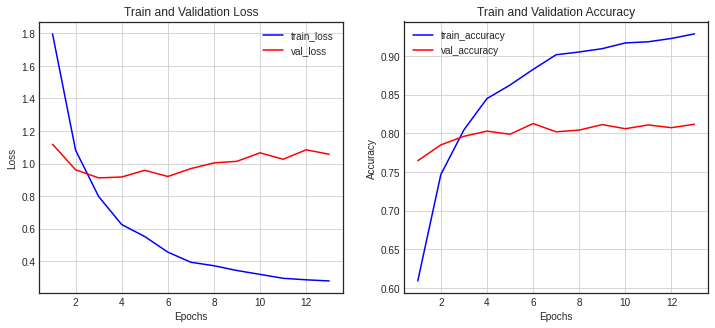

In [14]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [15]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.0107 - accuracy: 0.7752


[1.010657787322998, 0.7751558423042297]

### CIFAR10 small images classification dataset

<table align="left">
  <tr>
    <th>Label</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>0</td>
    <td>airplane</td>
  </tr>
  <tr>
    <td>1</td>
    <td>automobile</td>
  </tr>
  <tr>
    <td>2</td>
    <td>bird</td>
  </tr>
  <tr>
    <td>3</td>
    <td>cat</td>
  </tr>
  <tr>
    <td>4</td>
    <td>deer</td>
  </tr>
  <tr>
    <td>5</td>
    <td>dog</td>
  </tr>
  <tr>
    <td>6</td>
    <td>frog</td>
  </tr>
  <tr>
    <td>7</td>
    <td>horse</td>
  </tr>
  <tr>
    <td>8</td>
    <td>ship</td>
  </tr>
  <tr>
    <td>9</td>
    <td>truck</td>
  </tr>
</table>


In [16]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [17]:
(x_train_full, y_train_full) , (x_test, y_test) = cifar10.load_data()
x_train, x_val , y_train, y_val = train_test_split(x_train_full,y_train_full,test_size=0.2, random_state=2023)

print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [18]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

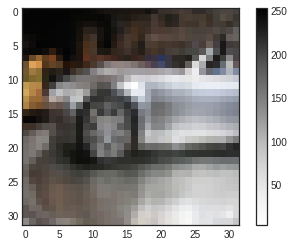

In [19]:
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [20]:
x_train = x_train.reshape(-1,32 * 32 * 3)
x_val = x_val.reshape(-1,32 * 32 * 3)
x_test = x_test.reshape(-1,32 * 32 * 3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [21]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [22]:
model = models.Sequential()
model.add(layers.Input(shape=(3072, )))
model.add(layers.BatchNormalization())
model.add(layers.Dense(2048, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.BatchNormalization())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_3 (Batch (None, 3072)              12288     
_________________________________________________________________
dense_6 (Dense)              (None, 2048)              6293504   
_________________________________________________________________
dropout_3 (Dropout)          (None, 2048)              0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 2048)              8192      
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 1024)             

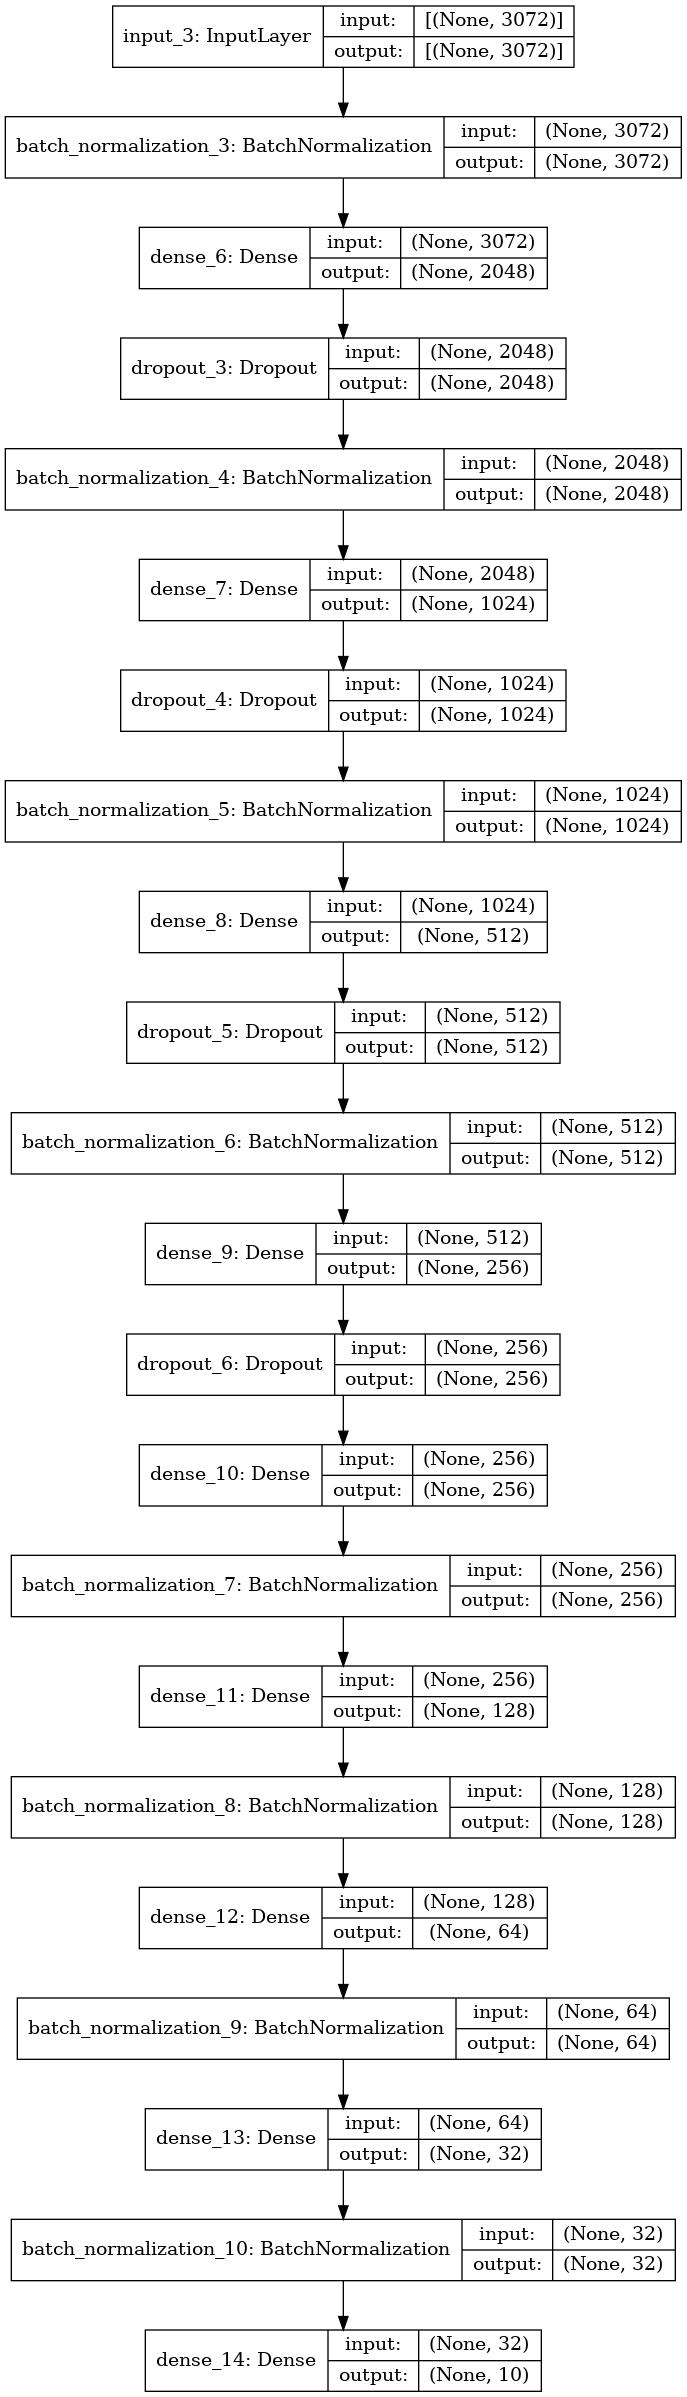

In [24]:
utils.plot_model(model, show_shapes=True)

In [25]:
checkpoint_cb = callbacks.ModelCheckpoint("best_model_cifar.h5", save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=20, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=100, batch_size=256, validation_data=(x_val, y_val), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/100
157/157 [==============================] - 4s 15ms/step - loss: 2.0554 - accuracy: 0.2661 - val_loss: 1.9339 - val_accuracy: 0.2884
Epoch 2/100
157/157 [==============================] - 2s 12ms/step - loss: 1.7422 - accuracy: 0.3687 - val_loss: 1.6534 - val_accuracy: 0.4073
Epoch 3/100
157/157 [==============================] - 2s 11ms/step - loss: 1.6100 - accuracy: 0.4206 - val_loss: 1.5508 - val_accuracy: 0.4531
Epoch 4/100
157/157 [==============================] - 2s 12ms/step - loss: 1.5144 - accuracy: 0.4612 - val_loss: 1.4719 - val_accuracy: 0.4834
Epoch 5/100
157/157 [==============================] - 2s 12ms/step - loss: 1.4392 - accuracy: 0.4891 - val_loss: 1.4312 - val_accuracy: 0.4967
Epoch 6/100
157/157 [==============================] - 2s 12ms/step - loss: 1.3771 - accuracy: 0.5106 - val_loss: 1.4122 - val_accuracy: 0.5108
Epoch 7/100
157/157 [==============================] - 2s 11ms/step - loss: 1.3256 - accuracy: 0.5296 - val_loss: 1.4044 - val_accuracy:

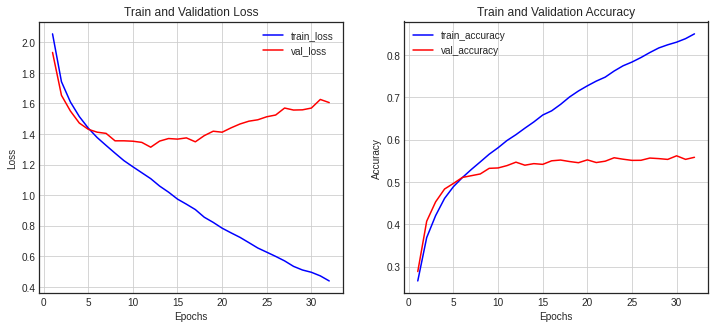

In [26]:
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()


show_history(history)

In [27]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.2936 - accuracy: 0.5502


[1.2936198711395264, 0.5501999855041504]